In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import math
from sklearn.metrics import mean_squared_error

%matplotlib inline

data = pd.read_excel("data.xlsx")
data

,Date,Sales
0,11-2017,261.9600
1,11-2017,731.9400
2,6-2017,14.6200
3,10-2016,957.5775
4,10-2016,22.3680
...,...,...
9795,5-2017,3.7980
9796,1-2016,10.3680
9797,1-2016,235.1880
9798,1-2016,26.3760


In [152]:
con = data['Date']
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index
data = data.sort_values(by='Date', ascending=True)

In [153]:
data['Sales'].head

<bound method NDFrame.head of Date
2015-01-01      29.700
2015-01-01    2573.820
2015-01-01     609.980
2015-01-01       5.480
2015-01-01       9.344
                ...   
2018-12-01     191.984
2018-12-01     323.136
2018-12-01      90.930
2018-12-01      46.672
2018-12-01     258.750
Name: Sales, Length: 9800, dtype: float64>

In [154]:
data = data.groupby('Date').sum('Sales')

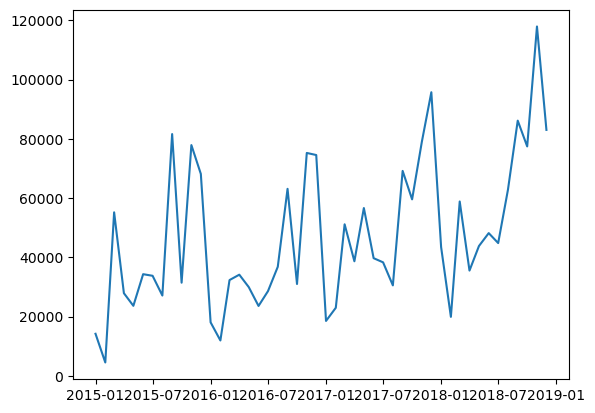

In [155]:
plt.plot(data)

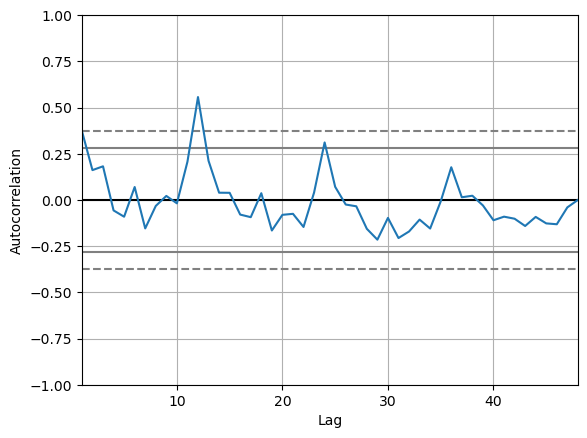

In [156]:
autocorrelation_plot(data)
plt.show()

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -539.984
Date:                Thu, 09 Nov 2023   AIC                           1087.969
Time:                        19:21:28   BIC                           1095.369
Sample:                    01-01-2015   HQIC                          1090.754
                         - 12-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5210      0.164     -3.170      0.002      -0.843      -0.199
ar.L2         -0.2863      0.187     -1.531      0.126      -0.653       0.080
ar.L3          0.0169      0.197      0.086      0.9

/Users/andrewturner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/andrewturner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/andrewturner/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


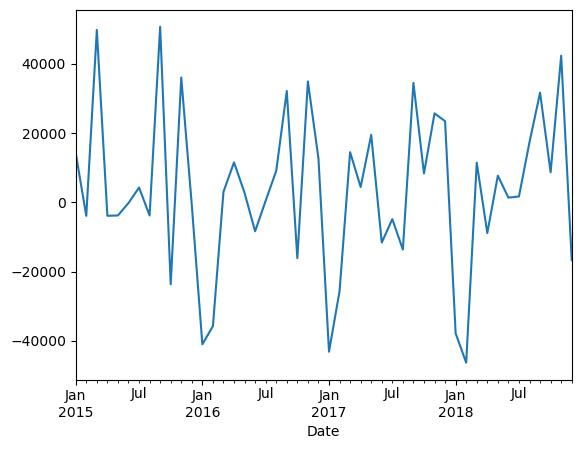

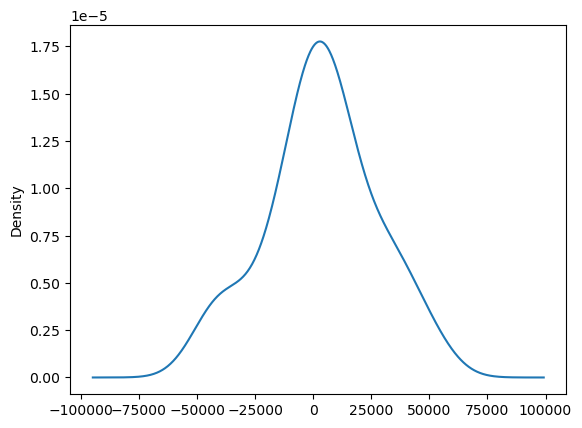

count       48.000000
mean      3408.848707
std      23434.854602
min     -46338.315174
25%      -8501.527806
50%       2856.710204
75%      15198.696781
max      50698.772232
dtype: float64


In [157]:
model = ARIMA(data, order=(3,1,0))
model_fit = model.fit()

# summary of fit model
print(model_fit.summary())

# line plot of residuals
residuals = model_fit.resid
residuals.plot()
plt.show()

# density plot of residuals
residuals.plot(kind='kde')
plt.show()

# summary stats of residuals
print(residuals.describe())

predicted=52665.147960, expected=30542.200300
predicted=30864.877562, expected=69193.390900
predicted=47056.323699, expected=59583.033000
predicted=54484.033387, expected=79066.495800
predicted=56852.625549, expected=95739.121000
predicted=79138.620835, expected=43476.474000
predicted=52143.724585, expected=19920.997400
predicted=51709.773597, expected=58863.412800
predicted=45955.798678, expected=35541.910100
predicted=52183.188387, expected=43825.982200
predicted=62697.049240, expected=48190.727700
predicted=41253.866773, expected=44825.104000
predicted=44804.439483, expected=62837.848000
predicted=62830.734265, expected=86152.888000
predicted=58044.614884, expected=77448.131200
predicted=71261.047447, expected=117938.155000
predicted=87319.152068, expected=83030.388800
Test RMSE: 24778.300


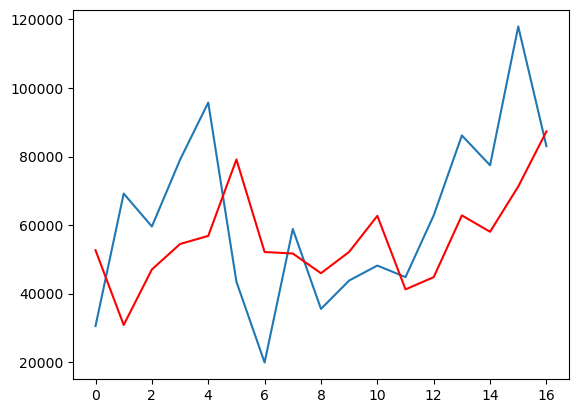

In [158]:
X = data.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(9,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
    
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()